In [1]:
import joblib
import pandas as pd
import numpy as np
import scanpy as sc

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
TECs = sc.read('/Users/Yi/Desktop/Aire C311Y/TECs_wo_KO_wo_cell_cycle.h5ad')

In [3]:
#all the cells
TECs.obs.index

Index(['AAACCCACACAGTCGC-1-0', 'AAACCCAGTAGTGTGG-1-0', 'AAACCCATCACTTTGT-1-0',
       'AAACGAATCTACTATC-1-0', 'AAACGCTAGTAAATGC-1-0', 'AAACGCTTCCCATGGG-1-0',
       'AAACGCTTCGCATTAG-1-0', 'AAAGAACAGAGTCAAT-1-0', 'AAAGGGCAGAGCAGCT-1-0',
       'AAAGGTATCGTAGGGA-1-0',
       ...
       'TTTCACATCAGAGCGA-1-2', 'TTTCAGTGTGTCGCTG-1-2', 'TTTCCTCCAGCGTATT-1-2',
       'TTTCGATAGCGCAATG-1-2', 'TTTCGATAGGAAAGGT-1-2', 'TTTCGATCAGGACAGT-1-2',
       'TTTCGATCATCTATCT-1-2', 'TTTCGATTCCAACTAG-1-2', 'TTTGACTTCCCAATAG-1-2',
       'TTTGGTTAGTGGTTGG-1-2'],
      dtype='object', name='index', length=3592)

In [12]:
# remove the batch tags
new_index =[i.split('-')[0] + '-1' for i in TECs.obs.index.tolist() if i. split('-')[2]=='0']

In [14]:
# remove the batch tags
new_index_CY =[i.split('-')[0] + '-1' for i in TECs.obs.index.tolist() if i. split('-')[2]=='1']

In [15]:
# remove the batch tags
new_index_GW=[i.split('-')[0] + '-1' for i in TECs.obs.index.tolist() if i. split('-')[2]=='2']

In [6]:
WT_10x_data = sc.read_10x_mtx('/Users/Yi/Desktop/Aire C311Y/Aire_WT_filtered_feature_bc_matrix')

In [7]:
C311Y_10x_data = sc.read_10x_mtx('/Users/Yi/Desktop/Aire C311Y/Aire_C311Y_het_filtered_feature_bc_matrix')

In [8]:
G228W_10x_data = sc.read_10x_mtx('/Users/Yi/Desktop/Aire C311Y/GW_Het_filtered_feature_bc_matrix')

In [19]:
WT =WT_10x_data[new_index,:]

In [20]:
CY =C311Y_10x_data[new_index_CY,:]

In [21]:
GW =G228W_10x_data[new_index_GW,:]

In [22]:
All = WT. concatenate(CY, GW)

In [23]:
TSA = pd.read_csv('/Users/Yi/Desktop/TSA_Table.csv')

In [24]:
TSA

,Gene Symbol,Ensembl ID,GNF GeneAtlas
0,Pbsn,ENSMUSG00000000003,TRE
1,Cdc45,ENSMUSG00000000028,TRE
2,Scml2,ENSMUSG00000000037,TRE
3,Apoh,ENSMUSG00000000049,TRE
4,Tbx2,ENSMUSG00000000093,TRE
5,Tbx4,ENSMUSG00000000094,TRE
6,Zfy2,ENSMUSG00000000103,TRE
7,Ngfr,ENSMUSG00000000120,TRE
8,Slc22a18,ENSMUSG00000000154,TRE
9,Itgb2l,ENSMUSG00000000157,TRE


In [27]:
TSA['Gene Symbol'].tolist()

['Pbsn',
 'Cdc45',
 'Scml2',
 'Apoh',
 'Tbx2',
 'Tbx4',
 'Zfy2',
 'Ngfr',
 'Slc22a18',
 'Itgb2l',
 'Pih1d2',
 'Nalcn',
 'Slfn4',
 'Th',
 'Ins2',
 'Scnn1g',
 'Drp2',
 'Lhx2',
 'Clec2g',
 'Glra1',
 'Pemt',
 'Cdh4',
 'Bcl6b',
 'Clec10a',
 'Alox12',
 'Arvcf',
 'Rnf17',
 'Wap',
 'Mx1',
 'Fap',
 'Gcg',
 'Egfl6',
 'Lck',
 'Tssk3',
 'Sept1',
 'Acvrl1',
 'Grasp',
 'Gpa33',
 'Itga5',
 'Gabra2',
 'Adora3',
 'Sema4f',
 'Sez6',
 'Haao',
 'Abhd15',
 'Hoxb6',
 'Loxl3',
 'Btn1a1',
 'Cryba1',
 'Dnmt3l',
 'Icosl',
 'Sult5a1',
 'Tcf7',
 'Slc5a5',
 'Txnrd3',
 'Fasl',
 'Znf512b',
 'Bcl11a',
 'Il4',
 'Gnb1l',
 'Dbh',
 'Mmp11',
 'Vpreb3',
 'Hoxa10',
 'Hoxa4',
 'Slc7a7',
 'Ccl3',
 'Expi',
 'Icam4',
 'S100a5',
 'Scn4a',
 'Icam2',
 'B9d1',
 'N4bp3',
 'Slc13a2',
 'Pcbp3',
 'Cfp',
 'Timp1',
 'Ftcd',
 'Oas1c',
 'Slc26a3',
 'Hpn',
 'Gabrg1',
 'Itgb7',
 'Rnd2',
 'Sync',
 'Fndc5',
 'Rhbg',
 'Tmem79',
 'Tbx21',
 'Meox1',
 'Sost',
 'Pax9',
 'Irx2',
 'Itga3',
 'Sgca',
 'Foxm1',
 'Nrip2',
 'Fkbp10',
 'Klhl10',
 'Tcea3',


In [30]:
new_genes=[i for i in TSA['Gene Symbol'].tolist() if i in All.var.index.tolist()]

In [32]:
All_TSA=All[:, new_genes]

In [33]:
sc.pp.normalize_per_cell(All_TSA,counts_per_cell_after=1e4)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [34]:
sc.pp.log1p(All_TSA)

In [35]:
All_TSA.raw=All_TSA

In [37]:
sc.pp.filter_cells(All_TSA, min_counts=0)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [39]:
All_TSA = All_TSA[:, All_TSA.X.sum(axis=0)>0]

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


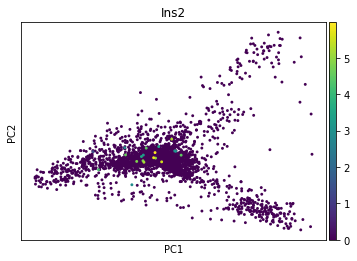

In [40]:
sc.pp.regress_out(All_TSA, ['n_counts'])
sc.pp.scale(All_TSA, max_value=10)
sc.tl.pca(All_TSA, svd_solver='arpack')
sc.pl.pca(All_TSA, color=['Ins2'])

In [42]:
import bbknn

In [44]:
bbknn.bbknn(All_TSA, batch_key='batch')  # running bbknn 1.3.6

In [45]:
sc.tl.umap(All_TSA)

In [46]:
sc.tl.leiden(All_TSA,resolution = 0.5)

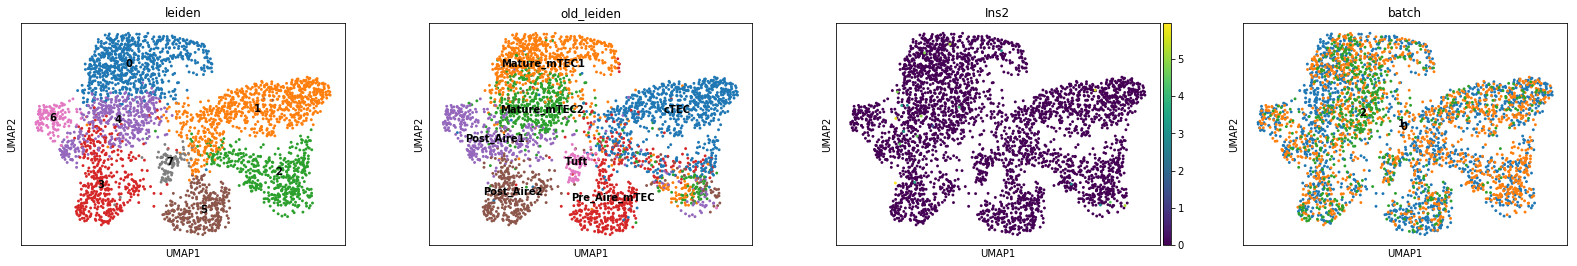

In [50]:
sc.pl.umap(All_TSA, color=['leiden','old_leiden','Ins2','batch'], legend_loc = 'on data')

In [48]:
All_TSA.obs['old_leiden']= TECs.obs.leiden

In [52]:
sc.tl.rank_genes_groups(All_TSA, groupby='leiden')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [53]:
All_TSA.uns['rank_genes_groups']['names']['2']

array(['Cd3d', 'Lck', 'Cd3g', 'Rhoh', 'Bcl11b', 'Ccr9', 'Cd8a', 'Cd8b1',
       'Tcf7', 'Cd27', 'Lat', 'Dntt', 'Skap1', 'Ptprcap', 'Arpp21',
       'Rag1', 'Sh2d1a', 'Cd28', 'Cd3e', 'Themis', 'Cd247', 'Aqp11',
       'Endou', 'Txk', 'Cd4', 'Hist3h2ba', 'Gpsm3', 'Sept1', 'Nsg2',
       'Itk', 'Gimap1', 'Lef1', 'Arhgef1', 'Camk4', 'Il21r', 'Rasgrp1',
       'Abi3', 'Frat2', 'Sla2', 'Ltb', 'Lcp2', 'Gimap9', 'Stap1',
       'Apbb1ip', 'Slfn2', 'Traf3ip3', 'Tctex1d1', 'Socs1', 'Slamf6',
       'Prrt1', 'Ntrk3', 'Dusp2', 'Tbc1d10c', 'Wdr78', 'Zap70', 'Rasal3',
       'Sh2d2a', 'Sit1', 'Capn3', 'Ikzf3', 'Rorc', 'Cd5', 'A930003A15Rik',
       'Cd6', 'Dok2', 'Cd2', 'Cd96', 'Rasgrp2', 'Tbxa2r', 'Tespa1',
       'Gpr171', 'Xrn1', 'Slc16a5', 'Fam189b', 'Icam2', 'Tnfrsf13b',
       'Pvr', 'Vamp1', 'Gngt2', 'Pecam1', 'Slc7a11', 'Sipa1', 'Gpr132',
       'Dclre1c', 'Slamf1', 'Cd37', 'Itgal', 'Mns1', 'P2rx1', 'Hcst',
       'Abcb9', 'Parvg', 'Insl5', 'Map4k2', 'Pou6f1', 'Grap2', 'Clec2i',
       'Rbm4

In [54]:
All_TSA.uns['rank_genes_groups']['names']['6']

array(['Ccl20', 'Pglyrp1', 'Fabp1', 'Bcl2a1b', 'Bcl2a1d', 'Krt20',
       '2200002D01Rik', 'Bcl2a1a', 'Spib', 'Prg2', 'Cyp2a5', 'Hamp',
       'Gp2', 'Csn2', 'Tnfrsf11b', 'Mmp7', 'Aif1', 'Apoa4', 'Muc13',
       'Msln', 'Reg3g', 'Rnase1', 'Sox8', 'Ubd', 'Plb1', 'Lgals4', 'Bmp2',
       'Pthlh', 'Cdh17', 'Apoc3', 'Cfp', 'Abca13', 'Trim31', 'Dsg1a',
       'Prss2', 'Cr2', 'Mmp23', 'Cybb', 'Gpa33', 'Ccr5', 'Pglyrp2',
       'Eci3', 'Vil1', 'Mep1a', 'Cdhr5', 'Mgam', 'Hsd17b6', 'Tmem37',
       'BC051142', 'Slc6a20a', 'Hepacam2', '2010003K11Rik', 'Fgr', 'Csn3',
       'Tstd1', 'Ccr1', 'Ceacam20', 'Sncg', 'Upp1', 'C2cd4b', 'Myo7b',
       'Timd2', 'Dapk2', 'Guca2b', 'Abo', 'Spns3', 'Trdn', 'Tnfrsf11a',
       'Pls1', 'Aplp1', 'Ccr2', '1700016C15Rik', 'Cldn13', 'Stk35',
       'Fabp2', 'Anxa10', 'Onecut2', 'Hoxd4', 'Cyp2j13', 'Slc4a10',
       'Snx20', 'Nxnl2', 'Ecel1', 'Il1b', 'Ccr7', 'Sept1',
       '4930452B06Rik', 'Arhgef9', 'Sult1b1', 'Klhdc8a', 'Serpina10',
       'Lrrc26', 'Ube2l6', 'G

In [55]:
mTEChi=All_TSA[(All_TSA.obs.leiden == '0')|(All_TSA.obs.leiden == '4')]

In [60]:
bbknn.bbknn(mTEChi, batch_key='batch',neighbors_within_batch=5)  # running bbknn 1.3.6

In [61]:
sc.tl.umap(mTEChi)

In [62]:
sc.tl.leiden(mTEChi,resolution = 0.5)

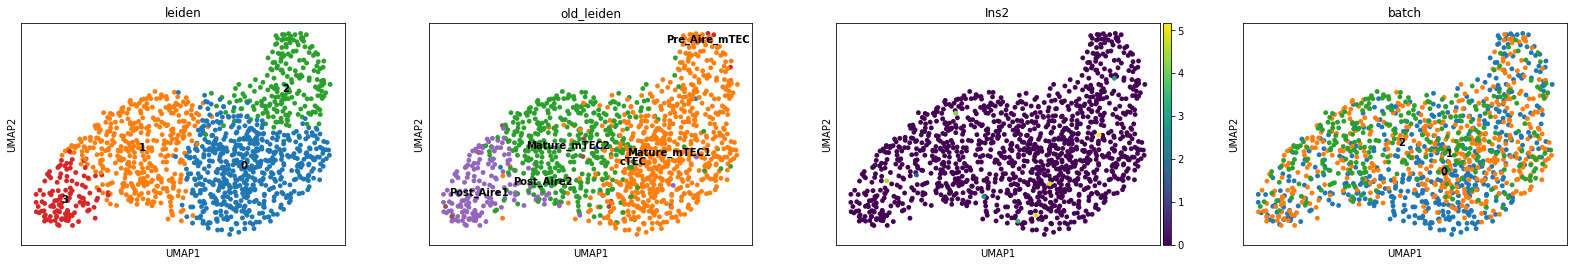

In [63]:
sc.pl.umap(mTEChi, color=['leiden','old_leiden','Ins2','batch'], legend_loc = 'on data')

In [64]:
All_TSA.write('/Users/Yi/Desktop/Aire C311Y/cluster_by_TSA_genes.h5ad')

... storing 'gene_ids-0' as categorical
... storing 'feature_types-0' as categorical
... storing 'gene_ids-1' as categorical
... storing 'feature_types-1' as categorical
... storing 'gene_ids-2' as categorical
... storing 'feature_types-2' as categorical
